<a href="https://colab.research.google.com/github/Mirlaa/Keras-primeiros-passos/blob/main/Preparando-Ambiente/Notebook_Keras_primeiros_passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras: Redes Neurais

O Iris dataset é um conjunto de dados bem conhecido na comunidade academica, esse conjunto de dados consiste em 50 amostras de cada uma das três espécies (150 amostras, no total) de Iris: *Iris setosa, Iris virginica e Iris versicolor*.

Quatro variáveis foram medidas em cada amostra: o comprimento (*length*) e a largura (*width*) das sépalas (*Sepal*) e pétalas (*Petal*), em centímetros. Com base na combinação dessas quatro características, é possível distinguir as espécies umas das outras.

![](https://kedro.readthedocs.io/en/0.17.5/_images/iris_measurements.png)

Abaixo a representação dos três tipos de flores Iris.

![](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

Iremos aprender como funciona um modelo neural e também construí-lo através da [**biblioteca Keras**](https://keras.io/)

In [1]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras

## Modelo - Perceptron

O [`keras.Sequential`](https://keras.io/api/models/sequential/) permite a criação de uma rede neural unindo camadas.

A camada [`Dense`](https://keras.io/api/layers/core_layers/dense/) é uma camada definida no Keras que promove os cálculos e transformações utilizadas na criação de um modelo.

Precisamos definir nela quantos neurônios ela conterá através do parâmetro `units` e podemos também definir a quantidade de entradas/características que os dados irão conter, para a implementação, vamos começar com dois.

In [2]:
modelo = keras.Sequential([
    keras.layers.Input(shape=[2]),
    keras.layers.Dense(1, name='neuronio')
])

**Explicação:**

1. O `Sequential` cria um modelo muito simples (um dos mais simples no Keras) de redes neurais. Desse modo, é construida somente uma única pilha de camadas sequencialmente conectadas.
2. A camada [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) é criada com 1 neurônio, representando o perceptron. A camada é responsável por cada peso contido nela bem como a inputação do vetor de viéses.
  * `units`: informa a quantidade de neurônios que a camada Dense terá;
  * `input_shape`: define a quantidade de entradas no modelo neural; e
  * `name`: permite nomearmos essa camada.

### Utilidades do modelo

#### Estrutura
Podemos entender a esturtura do modelo (perceptron) criado através do método [`summary`](https://keras.io/api/models/model/#:~:text=%5Bsource%5D-,summary%20method,-Model.summary) e a função [`utils.plot_model`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model) da biblioteca keras.

In [3]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ neuronio (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

A única camada que temos é o próprio neurônio que criamos. O parâmetro dado nela é definido como 3 pois é considerado **a soma da quantidade de pesos mais a quantidade de viéses**.

Os pesos são calculados multiplicando a quantidade de neurônios pela quantidade de entradas, desse modo, como definimos 2 entradas e 1 neurônio, teremos `2 * 1 = 2 pesos`, adicionadno o viés que é igual a quantidade de neurônios temos `2 + 1 = 3 parâmetros`.

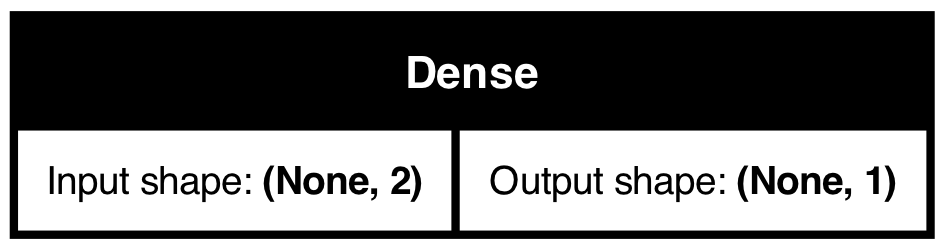

In [4]:
keras.utils.plot_model(modelo, show_shapes=True)

#### Pesos e viéses

Para identificar os pesos e viés que o modelo vai inicializar, podemos utilizar o método [`get_weights()`](https://keras.io/api/layers/base_layer/#:~:text=%5Bsource%5D-,get_weights%20method,-Layer.get_weights) e o método [`layers`](https://keras.io/api/layers/base_layer/).

* `layers`: retorna uma lista contendo as camadas do modelo criado;
* `get_weights`: coleta os pesos e viéses da camada enviada como objeto e os retorna como lista.

In [5]:
modelo.layers

[<Dense name=neuronio, built=True>]

In [6]:
modelo.layers[0].get_weights()

[array([[0.6400703],
        [1.2603306]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
pesos, bias = modelo.layers[0].get_weights()
print(pesos.shape)
pesos

(2, 1)


array([[0.6400703],
       [1.2603306]], dtype=float32)

In [8]:
print(bias.shape)
bias

(1,)


array([0.], dtype=float32)

##### Incializando

É possivel definir os pesos e viéses antes de criar o modelo, para isso utilizamos dois paramentros:

* `kernel_initializer`: inicializa a matriz de pesos do modelo; e
* `bias_initializer`: inicializa os valores de viéses.

Para definir os pesos iniciais, utilizamos dois métodos de [`keras.initializers`](https://keras.io/api/layers/initializers/):

* `keras.initializers.RandomNormal()`, para os pesos; e
* `keras.initializers.Ones()`, para o bias.

In [9]:
modelo = keras.Sequential(
    [
        keras.layers.Input(shape=[2]),
        keras.layers.Dense(
            1,
            name="neuronio",
            kernel_initializer=keras.initializers.RandomNormal,
            bias_initializer=keras.initializers.Ones,
        ),
    ]
)

modelo.layers[0].get_weights()

[array([[0.06803227],
        [0.01484332]], dtype=float32),
 array([1.], dtype=float32)]

## Dados

O Iris dataset é um conjunto de dados bem conhecido na comunidade academica, esse conjunto de dados consiste em 50 amostras de cada uma das três espécies (150 amostras, no total) de Iris: *Iris setosa, Iris virginica e Iris versicolor*.

Quatro variáveis foram medidas em cada amostra: o comprimento (*length*) e a largura (*width*) das sépalas (*Sepal*) e pétalas (*Petal*), em centímetros. Com base na combinação dessas quatro características, é possível distinguir as espécies umas das outras.

![](https://kedro.readthedocs.io/en/0.17.5/_images/iris_measurements.png)

Abaixo a representação dos três tipos de flores Iris.

![](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

### Importando os dados

É possivel realizar a coleta desse dataset através do método [`datasets`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) da biblioteca `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x[:,2],y=x[:,3],hue=y,palette='tab10')
plt.xlabel('comprimento (cm)',fontsize =16)
plt.ylabel('largura (cm)', fontsize=16)
plt.title('Distribuição pétalas', fontsize = 18)
plt.show()

In [ ]:
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, palette = "tab10")
plt.xlabel('comprimeto (cm)', fontsize = 16)
plt.ylabel('largura (cm)', fontsize = 16)
plt.title('Distribuição sépalas', fontsize = 18)
plt.show()

### Tratamento

#### Categorização

#### Normalização

Os dados serão normalizados entre [0, 1], para isso utilizamos o método [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler)

#### Separação de conjunto

A separação em conjuntos de treino e teste garantem um melhor processo de criação do modelo. Esses conjuntos são definidos a partir do conjunto total de dados, o qual separameos por proporções:

* **80%** - Treino
* **20%** - Teste

## Modelo - MLP

### Criação do modelo

Fazemos um modelo MLP definido por 1 camada de entrada, 1 camada oculta e 1 camada de saída.

### Treinamento

#### Compilando o modelo

Compilar o modelo se dá pelo método [`compile`](https://keras.io/api/models/model_training_apis/). Nessa etapa devemos especificar a função de perda e o otimizador a ser usado. Uma opção também é especificar as métricas a serem calculadas durante o treinamento e avaliação do modelo.

**Explicação:**

1. A perda escolhida foi a `'categorical_crossentropy'` pois os resultads em y são valores categóricos.
2. O uso do otimizador `'rmsprop'` indica que iremos treinar o modelo baseado em gradiente descendente, que calcula a média móvel de gradientes quadrados para normalizar o gradiente (processo de retropropagação será aplicado ao realizar o treinamento).
3. Por esse modelo ser um classificador simples, é interessante calcular o valor da acurácia durante o treino e validação.

#### Treino

O treinamento é feito com o método `fit`, sendo especificado as entredas e saídas esperadas de treino, épocas e também os dados de validação.

**Explicação:**

1. Para treinamento é preciso passar os dados de entradas e saídas do conjunto de treinamento.
2. Nesse caso o número de épocas também é essencial pois o padrão da biblioteca é 1 época, o que não é tão bom para o aprendizado.
3. Passamos também a porcentagem do conjunto de validação para serem considerados do conjunto de treino - 30% do conjunto de treino

**Interpretando a exibição:**

Exemplo de exibição: 
```
Epoch 100/100
3/3 [==============================] - 0s 47ms/step - loss: 0.1451 - categorical_accuracy: 0.9524 - val_loss: 0.1456 - val_categorical_accuracy: 0.9722
```
- A época de treinamento: *`Epoch 100/100`*
- Quantidade de **instâncias processadas**: *`3/3`*
  * Aqui, temos a quantidade de amostras divididas pela número de [batch_size](https://www.deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/). Normalmente a batch é definida com 32 no keras, temos 84 amostras (70% do conjunto de treino) no treinamento, resultando assim em aproximadamente 3 instâncias.
- A barra de progresso: *`[==============================]`*
- Tempo de treinamento de cada amostra: *`0s 13ms/step`*
- Perda e acurária no conjunto de treinamento: *`loss: 0.1506 - categorical_accuracy: 0.9524`*
- Perda e acurária no conjunto de validação: *`val_loss: 0.1494 - val_categorical_accuracy: 0.9722`*

### Avaliação

#### Aprendizado

Podemos avaliar o desempenho do nosso modelo durante o treinamento com os dados de `historico` através do método `history` e plotar o processo de aprendizado

Para observar mais de perto o aprendizado do modelo podemos plotar curvas individuais e perceber como no aprendizado, ambos os conjuntos obtiveram resultados similares. Isso nos garante que não ocorreu sobreajuste no treinamento.

A constancia das curvas é diferente pois os valores de erro  da validação é calculada por época e para o treinamento é feito uma média dos valores de erro durante as iterações de cada época.

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['categorical_accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

#### Teste

Podemos testar o modelo e verificar seu resultado final através do método [`evaluate`](https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,evaluate%20method,-Model.evaluate) que nos mostra a perda e acurácia obtida no conjunto de teste.

O método [`predict`](https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,predict%20method,-Model.predict) gera a predição do modelo para as entradas enviadas.

Faremos o teste: as entradas `[[0.61, 0.5, 0.69, 0.79]]` devem resultar em uma indicação de flor Virginica - `[0., 0., 1.]`